In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import datetime
import geopandas as gpd
import folium
import time
import my_code
warnings.filterwarnings('ignore')
from scipy.stats.stats import pearsonr 
import seaborn as sns

data = pd.read_csv('/Users/alket/Desktop/dati/new_data2_Modena_backfill_forwfill.csv',index_col = 0, parse_dates=True)
data
agg_by_cell = data.groupby(['cell_num'])

counter = 0
for i, k in agg_by_cell: 
    print(i, k)
    counter += 1
    if counter > 1 : break

389-1015                 date  cell_num  nr_people  hours  minutes
0         2017-04-16  389-1015      361.0    0.0      0.0
1353      2017-04-16  389-1015      367.0    0.0     15.0
2706      2017-04-16  389-1015      359.0    0.0     30.0
4059      2017-04-16  389-1015      354.0    0.0     45.0
5412      2017-04-16  389-1015      350.0    1.0      0.0
...              ...       ...        ...    ...      ...
15969459  2017-08-16  389-1015      269.0   22.0     45.0
15970812  2017-08-16  389-1015      268.0   23.0      0.0
15972165  2017-08-16  389-1015      271.0   23.0     15.0
15973518  2017-08-16  389-1015      266.0   23.0     30.0
15974871  2017-08-16  389-1015      266.0   23.0     45.0

[11808 rows x 5 columns]
389-1016                 date  cell_num  nr_people  hours  minutes
1         2017-04-16  389-1016      188.0    0.0      0.0
1354      2017-04-16  389-1016      191.0    0.0     15.0
2707      2017-04-16  389-1016      186.0    0.0     30.0
4060      2017-04-16  389-10

In [2]:
agg_by_cell = data.groupby(['cell_num'])
len(agg_by_cell)

1353

In [202]:
counter = 0
for i, k in agg_by_cell: 
    print(i, k)
    counter += 1
    if counter > 1 : break

389-1015                 date  cell_num  nr_people  hours  minutes
0         2017-04-16  389-1015      361.0    0.0      0.0
1353      2017-04-16  389-1015      367.0    0.0     15.0
2706      2017-04-16  389-1015      359.0    0.0     30.0
4059      2017-04-16  389-1015      354.0    0.0     45.0
5412      2017-04-16  389-1015      350.0    1.0      0.0
...              ...       ...        ...    ...      ...
15969459  2017-08-16  389-1015      269.0   22.0     45.0
15970812  2017-08-16  389-1015      268.0   23.0      0.0
15972165  2017-08-16  389-1015      271.0   23.0     15.0
15973518  2017-08-16  389-1015      266.0   23.0     30.0
15974871  2017-08-16  389-1015      266.0   23.0     45.0

[11808 rows x 5 columns]
389-1016                 date  cell_num  nr_people  hours  minutes
1         2017-04-16  389-1016      188.0    0.0      0.0
1354      2017-04-16  389-1016      191.0    0.0     15.0
2707      2017-04-16  389-1016      186.0    0.0     30.0
4060      2017-04-16  389-10

### Correlate cells with their adiacents up to 12 cells away 

In [203]:
def get_corr_adiacent_cells(cell, index):
    counter = 0
    adiacent_cells = []
    s = cell.split('-')
    row = int(s[0])
    col = int(s[1])
    rowup = row+index
    rowdown = row-index
    coldes = col+index
    colsin = col-index
    cell1 = str(row)+'-'+str(coldes)
    cell2 = str(row)+'-'+str(colsin)
    cell3 = str(rowup)+'-'+str(col)
    cell4 = str(rowdown)+'-'+str(col)
    
    cell5 = str(rowup)+'-'+str(coldes)
    cell6 = str(rowup)+'-'+str(colsin)
    cell7 = str(rowdown)+'-'+str(coldes)
    cell8 = str(rowdown)+'-'+str(colsin)
    adiacent_cells.extend([cell1, cell2, cell3, cell4, cell5, cell6, cell7, cell8])
        
    return adiacent_cells

In [204]:
cells2be_correlated = ['400-1035', '400-1036', '400-1037', '400-1028', '400-1029', '400-1032',
                       '401-1035', '401-1038', '401-1041', '401-1033', '401-1029', '401-1032',
                       '402-1043', '402-1039', '402-1033', '402-1035', '402-1037', '402-1031',
                       '403-1043', '403-1031', '403-1034', '403-1036', '403-1037', '403-1039',
                       '404-1036', '404-1037', '404-1038', '404-1040', '404-1042', '404-1035',
                       '409-1036', '409-1037', '409-1038', '409-1040', '409-1042', '409-1035',
                       '408-1036', '408-1037', '408-1038', '408-1040', '408-1042', '408-1035',
                       '407-1035', '407-1037', '407-1039', '407-1041', '407-1042', '407-1036',
                       '405-1031', '405-1032', '405-1034', '405-1036', '405-1038', '405-1042',
                       '406-1034', '406-1031', '406-1033', '406-1035', '406-1039', '406-1040']

In [330]:
data2dict = {}
for num in range(10):
    num = num+1
    #print('step = ', num)
    cell2mean = []
    for cell2c in cells2be_correlated:
        #try:
        adiacent_cells = get_corr_adiacent_cells(cell2c, num)
        #except:
        #    'KeyError'
        corrlist = []
        #try: 
        cell_itself = agg_by_cell.get_group(cell2c)
        cell_itself = cell_itself['nr_people'].values
        #except: 
         #   'KeyError'
        #corrlist.append(cell_itself['nr_people'].values)
        for i in adiacent_cells: 
           # try: 
                cell_i = agg_by_cell.get_group(i)
                cell_i = cell_i['nr_people'].values
                #print(cell_itself[:4])
                #print(cell_itself[:1])
                #print(len(cell_itself), len(cell_i))
                pc = pearsonr(cell_itself, cell_i)
                corrlist.append(pc[0])
           # except: 
           #     'KeyError'
        #corr = np.array(corrlist)
        #corr_matrix = np.corrcoef(corr)
        #mean = np.mean(corr_matrix)
        #cell2mean.append(mean)
        print(num , np.mean(np.array(corrlist)))
        data2dict[num] = np.mean(np.array(corrlist))

1 0.9816707796341462
1 0.9487044764170562
1 0.9495897525932301
1 0.9746399060220403
1 0.9700818258573345
1 0.975512297014135
1 0.9739316348782997
1 0.973322400966361
1 0.9800486621197718
1 0.976589117585974
1 0.9825426733845526
1 0.974006658825748
1 0.870548126825055
1 0.9578129295695723
1 0.9753712621828156
1 0.9806466749652726
1 0.9792194318737555
1 0.9746331409899058
1 0.9249442655646068
1 0.9854495314221619
1 0.9864945107945966
1 0.9873759697984604
1 0.9873764224812785
1 0.9820945670580669
1 0.989192106250935
1 0.9892282505915813
1 0.9888525198284642
1 0.9821876130213855
1 0.9645613802476963
1 0.9836835929131591
1 0.9876562326153004
1 0.9352674786552151
1 0.9072897292832368
1 0.9565304548950806
1 0.9349983007907867
1 0.9905929398621455
1 0.9697041037446316
1 0.9451147302698925
1 0.9494246687605237
1 0.9784541962768118
1 0.9625248685676338
1 0.9866040800269642
1 0.978211417335302
1 0.9623413756715731
1 0.9415884306286116
1 0.9557759843576363
1 0.9776977962018436
1 0.9694109051479125

7 0.7866815497487474
7 0.7997383333225228
7 0.8070053236333388
7 0.7862492730771495
7 0.7931310707830147
7 0.8379311418070854
7 0.776927230779933
7 0.812814052364752
7 0.7980161248110662
7 0.8242499405492054
7 0.7912506883857151
7 0.8325274223000668
7 0.8033622153154469
7 0.8146608786542795
7 0.8075335442843266
8 0.6424680502489641
8 0.646496505546863
8 0.6446714426643414
8 0.6707940324592866
8 0.6916206048218196
8 0.682137408834556
8 0.6425816257546259
8 0.7135176013948175
8 0.7059175356425768
8 0.6532810912932114
8 0.7083504249944865
8 0.6433771058123198
8 0.6708951245737869
8 0.7801039727711376
8 0.6968614774423791
8 0.6434850212031704
8 0.7197529246380457
8 0.7996521243891128
8 0.7163406246944981
8 0.7591783038641063
8 0.678911620102082
8 0.7199713797553706
8 0.7415741676060186
8 0.7297839252757959
8 0.6919814322762227
8 0.7209830392508909
8 0.8127640959718418
8 0.7648026762615276
8 0.7917728480758126
8 0.6864073849966781
8 0.7412732436167675
8 0.7720345072454688
8 0.79629318907155

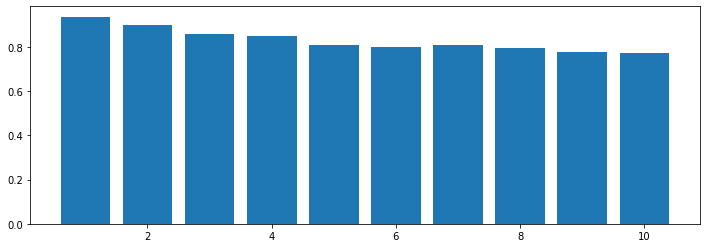

In [274]:
keys = data2dict.keys()
values = data2dict.values()

plt.figure(figsize = (12,4))
plt.bar(keys, values)
plt.show()

### Correlate cells with their adiacents by using their percentage change

In [275]:
data2dict = {}
for num in range(10):
    num = num+1
    #print('step ', num)
    for cell2c in cells2be_correlated:
        mean2step = []
        try:
            adiacent_cells = get_corr_adiacent_cells(cell2c, num)
        except:
            'KeyError'
        corrlist = []
        try: 
            cell_itself = agg_by_cell.get_group(cell2c)
        except: 
            'KeyError'
        cell_itself = cell_itself['nr_people'].pct_change().values
        cell_itself = cell_itself[1:]
        #print(len(cell_itself))
            #corrlist.append()
        for i in adiacent_cells: 
            #try: 
                cell_i = agg_by_cell.get_group(i)
                cell_i = cell_i['nr_people'].pct_change().values
                cell_i = cell_i[1:]
                
                #print(len(cell_i), len(cell_itself))
                
                pc = pearsonr(cell_itself, cell_i)
                #print(pc[0])
                corrlist.append(pc[0])
            #except: 
            #    'KeyError'
        #corr = np.array(corrlist)
        #corr_matrix = np.corrcoef(corr)
        #mean = np.mean(corr_matrix[0])
        
        #mean2step.append(mean)
    print(num, np.mean(np.array(corrlist))) 
    data2dict[num] = np.mean(np.array(corrlist))

1 0.6756696466546996
2 0.36123523349789155
3 0.22350666378887774
4 0.11918011193989245
5 0.09442515344772671
6 0.09612013085221242
7 0.11121933127453835
8 0.08513018111333559
9 0.07830467439112232
10 0.06404104745369825


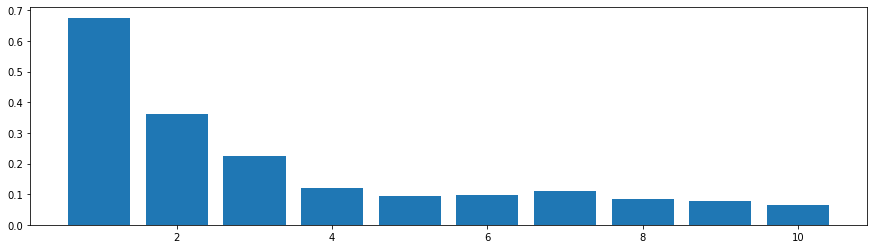

In [276]:
keys = data2dict.keys()
values = data2dict.values()

plt.figure(figsize = (15,4))
plt.bar(keys, values)
plt.show()

### Correlate cells with their lagged adiacents 

In [278]:
data2dict = {}
shifted_index = 1
for num in range(10):
    num = num+1
    #print('step = ', num)
    cell2mean = []
    for cell2c in cells2be_correlated:
        #try:
        adiacent_cells = get_corr_adiacent_cells(cell2c, num)
        #except:
        #    'KeyError'
        corrlist = []
        #try: 
        cell_itself = agg_by_cell.get_group(cell2c)
        #except: 
        #    'KeyError'
        ci = cell_itself['nr_people'].values 
        #print(ci[:3])
        ci = ci[:len(ci)-shifted_index]
        #print(ci[:3])
        #print(len(ci))
        #corrlist.append(ci)
        for i in adiacent_cells: 
            #try: 
                cell_i = agg_by_cell.get_group(i)
                cell_i = cell_i['nr_people'].shift(shifted_index).values
                #print(cell_i[:10])
                cell_i = cell_i[shifted_index:]
                pc = pearsonr(ci,cell_i)
                corrlist.append(pc[0])
            #except: 
            #    'KeyError'
        #corr = np.array(corrlist)
        #corr_matrix = np.corrcoef(corr)
        #mean = np.median(corr_matrix[0])
        #cell2mean.append(mean)
    print(num , np.mean(np.array(corrlist)))
    data2dict[num] = np.mean(np.array(corrlist))

1 0.9364926357181618
2 0.8998825922613689
3 0.8577113679167989
4 0.8507838063656847
5 0.8094907538489685
6 0.798952562250407
7 0.8075027167638635
8 0.7928103306859797
9 0.7790214722598059
10 0.7736323520205906


### Correlate cells with their lagged adiacents by using percentage change

In [240]:
data2dict = {}
shifted_steps = 1
for num in range(10):
    num = num+1
    #print('step ', num)
    for cell2c in cells2be_correlated:
        mean2step = []
        try:
            adiacent_cells = get_corr_adiacent_cells(cell2c, num)
        except:
            'KeyError'
        corrlist = []
        try: 
            cell_itself = agg_by_cell.get_group(cell2c)
        except: 
            'KeyError'
        cell_itself = cell_itself['nr_people'].pct_change().values
        cell_itself = cell_itself[2:]
        cell_itself = cell_itself[:len(cell_itself- shifted_steps)]
        #corrlist.append(cell_itself)
        for i in adiacent_cells: 
            try: 
                cell_i = agg_by_cell.get_group(i)
                cell_i = cell_i['nr_people'].shift(shifted_steps).pct_change().values
                cell_i = cell_i[shifted_steps+1:]
                #print(len(cell_i), len(cell_itself))
                pc = pearsonr(cell_itself, cell_i)
                corrlist.append(pc[0])
            except: 
                'KeyError'
        #corr = np.array(corrlist)
        #corr_matrix = np.corrcoef(corr)
        #print(corr_matrix[0])
        #mean = np.mean(corr_matrix[0])
        
        #mean2step.append(mean)
    print(num, np.mean(np.array(corrlist))) 
    data2dict[num] = np.mean(np.array(corrlist))

1 0.03927236179116417
2 0.06029608674338236
3 0.07700740517277677
4 0.07273749974908224
5 0.06377795019861891
6 0.06477608346158135
7 0.07041313326314207
8 0.05596551084730764
9 0.050149822158073634
10 0.04570275659520481


In [288]:
df1 = pd.DataFrame({'A':[1, 2, 3, 4, 5, 5, 4], 'B':[3, 2, 4, 5, 6, 7, 8], 
                    'C':[13, 12, 14, 15, 16, 17, 18],'D':[113, 112, 14, 15, 1116, 17, 28],
                    'E':[33, 42, 44, 65, 76, 87, 98],'F':[1113, 112, 14, 15, 1116, 17, 28]})
df1

,A,B,C,D,E,F
0,1,3,13,113,33,1113
1,2,2,12,112,42,112
2,3,4,14,14,44,14
3,4,5,15,15,65,15
4,5,6,16,1116,76,1116
5,5,7,17,17,87,17
6,4,8,18,28,98,28


In [301]:
l1 = df1['A'].values
l2 = df1['B'].values
l3 = df1['C'].values
l4 = df1['D'].values
l5 = df1['E'].values
l6 = df1['F'].values
l = [l2, l3, l4, l5, l6]
my_list = np.array([1, 2, 3, 4, 5, 6, 7])

for i in l: 
    pc = pearsonr(my_list, i)
    print(pc)

(0.9642857142857142, 0.0004541491691941796)
(0.9642857142857142, 0.0004541491691941796)
(0.12502505681984893, 0.7894058358160523)
(0.9883882139480709, 2.7732847590407933e-05)
(-0.3431426314891961, 0.4511443968629552)


In [332]:
l1s = df1['A'].shift(1)
l2s = df1['B'].shift(1)
l3s = df1['C'].shift(1)
l4s = df1['D'].shift(1)
l5s = df1['E'].shift(1)
l6s = df1['F'].shift(1)
ls = [l2s, l3s, l4s, l5s, l6s]
my_list = pd.Series([1, 2, 3, 4, 5, 6, 7])
print(type(my_list))
print(type( df1['A']))
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [328]:
a = crosscorr(my_list, df1['A'], 2)

In [329]:
a

0.9999999999999999